Basic CNN for fashion MNIST problem

Code by Ayush Agarwal , IIT BHU ECE24, Infoedge DS

In [22]:
import tensorflow as tf
print("Tensorflow version : ",end="")
print(tf.__version__)

import numpy as np
import matplotlib.pyplot as plt

Tensorflow version : 2.15.0


In [23]:
# These are the datasets availaible by default in tensorflow keras - https://www.tensorflow.org/api_docs/python/tf/keras/datasets

# I am going to use Fasion MNIST to make a clothes classifier
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
(X_train,y_train),(X_valid,y_valid) = (train_images, train_labels), (test_images, test_labels)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

# In Python, a single element within parentheses without a comma (e.g., (60000)) is interpreted as a regular integer, not a tuple. To create a tuple with a single element, you need the trailing comma. This distinction helps the language correctly interpret the shape of the array.
# The (60000,) notation is a tuple indicating a one-dimensional array with 60,000 elements.

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Label	Description

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

In [24]:
# visualization
# print(train_images[0])
# an image is just a 28x28 array with values from 0 to 255 in it

In [25]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# python is useful for double assignents like this , remember a,b=b,a for swapping numbers, just like that

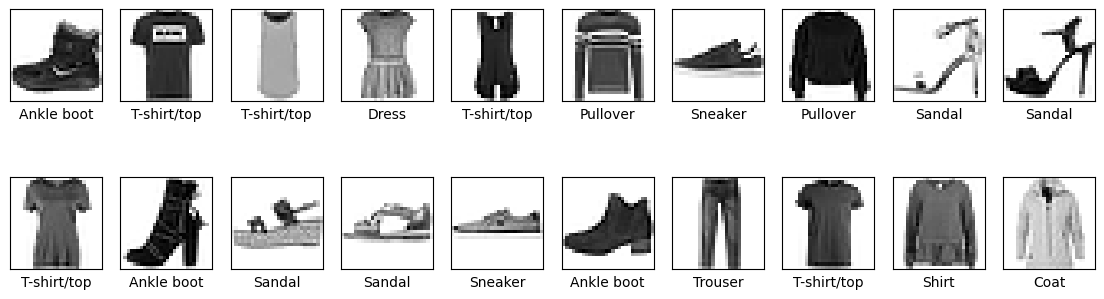

In [26]:
# This subplot way is actually a very common way to visualize data in tensorflow guide , saw it in multiple docs

plt.figure(figsize=(14,4))
for i in range(20):
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
    plt.subplot(2,10,i+1)
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
    # we can set x and y labels in a plot
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # here we used the array which we made above to replace numbers with names
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [27]:
from tensorflow import keras
from tensorflow.keras import layers, models

# number of output classes
num_classes = len(class_names)

# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
# very good explanation of all classes of tf keras models

# Docs -
# tf.keras.Sequential(
#     layers=None, trainable=True, name=None
# )

# Different types of layers
# https://www.tensorflow.org/api_docs/python/tf/keras/layers

cnn_model_1 = models.Sequential(
    layers = [
        # layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
        # I won't need rescaling layer as I already have done /255 above
        layers.Conv2D(16, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        # https://www.tensorflow.org/api_docs/python/tf/keras/layers/ELU
        layers.Conv2D(32, 3, padding='same', activation='elu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding='same', activation='elu'),
        layers.MaxPooling2D(),
        # dropout layer to reduce overfitting
        layers.Dropout(0.2),
        layers.Flatten(),
        # layers.Dense(128, activation='relu'),
        # layers.Dense(num_classes)
    ]
)

# Docs -
# add(
#     layer, rebuild=True
# )

# cnn_model_1.add(layers.Flatten())
cnn_model_1.add(layers.Dense(64, activation='relu'))
cnn_model_1.add(layers.Dense(10))

# We can add layers by directly adding them while declaring the model
# as well as using the add method like this

# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam
cnn_model_1.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),       #'adam', default lr is 0.001 for adam
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# agar end of last epoch tak lag raha hai ki accuracy badh raha tha to learning rate badha do number of epochs same rakh ke
# ya fir number of epochs bhi badha sakte ho (but that would take more time )

# Docs -
# compile(
#     optimizer='rmsprop',
#     loss=None,
#     loss_weights=None,
#     metrics=None,
#     weighted_metrics=None,
#     run_eagerly=False,
#     steps_per_execution=1,
#     jit_compile='auto',
#     auto_scale_loss=True
# )

# When using the delayed-build pattern (no input shape specified), you can choose to manually build your model by calling
# `build(batch_input_shape)`

# BATCH SIZE
# Higher the batch size, the more memory would be required to train the model
# If we take batch_size = number of samples (60000 here) then it will move perfectly but converge very slowly , would require lots of epochs
# if we take batch_size = 1 then its stochatic gradient descent, it will move values fast but won't converge to correct value
# so we use mini batch gradient descent
# batch_size = 300
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
# Input shape = A 4D tensor with shape: (batch_size, height, width, channels)
cnn_model_1.build(input_shape=(1,28,28,1))
cnn_model_1.summary()



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (1, 28, 28, 16)           160       
                                                                 
 max_pooling2d_6 (MaxPoolin  (1, 14, 14, 16)           0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (1, 14, 14, 32)           4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (1, 7, 7, 32)             0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (1, 7, 7, 64)             18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (1, 3, 3, 64)            

In [28]:
history = cnn_model_1.fit(train_images, train_labels, epochs=10, batch_size=30,
                    validation_data=(test_images, test_labels))

# My observation - Batch size can be changed both here as well as above in the input layer of model
# would be better to set the batch size here only

# fit(
#     x=None,
#     y=None,
#     batch_size=None,
#     epochs=1,
#     verbose='auto',
#     callbacks=None,
#     validation_split=0.0,
#     validation_data=None,
#     shuffle=True,
#     class_weight=None,
#     sample_weight=None,
#     initial_epoch=0,
#     steps_per_epoch=None,
#     validation_steps=None,
#     validation_batch_size=None,
#     validation_freq=1
# )

Epoch 1/10
2000/2000 [==============================] - 10s 4ms/step - loss: 0.4849 - accuracy: 0.8213 - val_loss: 0.3355 - val_accuracy: 0.8762
Epoch 2/10
2000/2000 [==============================] - 9s 5ms/step - loss: 0.3143 - accuracy: 0.8845 - val_loss: 0.2971 - val_accuracy: 0.8903
Epoch 3/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.2704 - accuracy: 0.8997 - val_loss: 0.2760 - val_accuracy: 0.8960
Epoch 4/10
2000/2000 [==============================] - 9s 4ms/step - loss: 0.2462 - accuracy: 0.9078 - val_loss: 0.2601 - val_accuracy: 0.9063
Epoch 5/10
2000/2000 [==============================] - 9s 4ms/step - loss: 0.2247 - accuracy: 0.9165 - val_loss: 0.2547 - val_accuracy: 0.9060
Epoch 6/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.2070 - accuracy: 0.9227 - val_loss: 0.2490 - val_accuracy: 0.9093
Epoch 7/10
2000/2000 [==============================] - 9s 4ms/step - loss: 0.1930 - accuracy: 0.9281 - val_loss: 0.2446 - val_accuracy

313/313 - 1s - loss: 0.2450 - accuracy: 0.9168 - 613ms/epoch - 2ms/step

Test accuracy: 0.9168000221252441


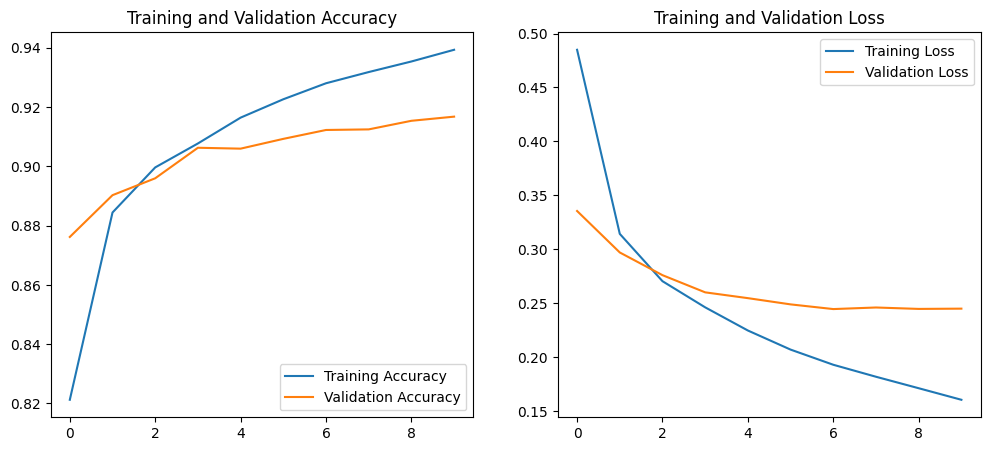

In [29]:
# Visualizing the results for the model

# evaluate the model at the end
test_loss, test_acc = cnn_model_1.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Returns the loss value & metrics values for the model in test mode.
# evaluate(
#     x=None,
#     y=None,
#     batch_size=None,
#     verbose='auto',
#     sample_weight=None,
#     steps=None,
#     callbacks=None,
#     return_dict=False,
#     **kwargs
# )


# way 1 to visualize
# plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
# plt.legend(loc='lower right')


# way 2 to visualize -

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = 10 # was meant to be defined above but we directly wrote 10 there so defining here
epochs_range = range(epochs)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



313/313 [==============================] - 1s 2ms/step


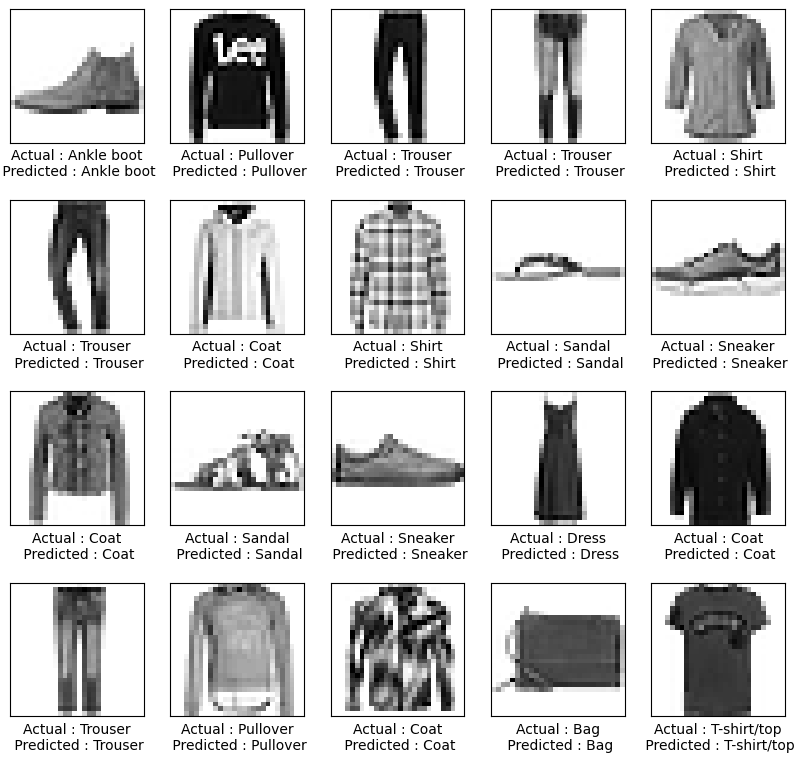

In [30]:
# https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb
# To see the model predictions on few cases

probability_model = tf.keras.Sequential([cnn_model_1,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

plt.figure(figsize=(10,12))
for i in range(20):
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
    plt.subplot(5,5,i+1)
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
    # we can set x and y labels in a plot
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    # here we used the array which we made above to replace numbers with names
    plt.xlabel("Actual : " + str(class_names[test_labels[i]]) + "\n Predicted : " + str(class_names[np.argmax(predictions[i])]))
    # plt.ylabel(class_names[np.argmax(predictions[i])])
plt.show()

In [37]:
# Saving ML model as .keras format

cnn_model_1.save('cnn_fashion_mnist_model.keras')
# https://www.tensorflow.org/tutorials/keras/save_and_load
saved_model = tf.keras.models.load_model('cnn_fashion_mnist_model.keras')

# Show the model architecture
saved_model.summary()

loss, acc = saved_model.evaluate(test_images, test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

print(saved_model.predict(test_images).shape)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (1, 28, 28, 16)           160       
                                                                 
 max_pooling2d_6 (MaxPoolin  (1, 14, 14, 16)           0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (1, 14, 14, 32)           4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (1, 7, 7, 32)             0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (1, 7, 7, 64)             18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (1, 3, 3, 64)            

In [36]:
# Saving ML model as .h5 format

cnn_model_1.save('cnn_fashion_mnist_model.h5')
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('cnn_fashion_mnist_model.h5')

# Show the model architecture
new_model.summary()

loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (1, 28, 28, 16)           160       
                                                                 
 max_pooling2d_6 (MaxPoolin  (1, 14, 14, 16)           0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (1, 14, 14, 32)           4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (1, 7, 7, 32)             0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (1, 7, 7, 64)             18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (1, 3, 3, 64)            

In [34]:
# Source from links from which I learnt to code this -

# https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/classification.ipynb
# fashion mnist loading details - https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb
# https://www.tensorflow.org/tutorials/images/cnn

Code by Ayush Agarwal , IIT BHU ECE'24, Infoedge DS